# Fraud Detection

We are given a dataset with informations of customers from a bank applying for an advanced credit card. These informations are the data that customers had to provide when filling the application form. Our goal is to detect potential fraud within these applications.  

At the end, we need to give a list of the customers who potentially cheated.   

We will achieve this with unsupervised deep learning, which means that we will identify some patterns in a high dimensional dataset full of non-linear relationships and one of these patterns will be the potential frauds.  

In [1]:
# 1. IMPORTING THE LIBRARIES:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 2. IMPORTING THE DATASET:
dataset = pd.read_csv('Credit_Card_Applications.csv')
#split the dataset
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
#y = the class column: 1 the application of the credit card is approved and 0 is not approved
# in the self organizing map we can clearly distinguish the customers who didn't get approvals to their application and the customer who got approval
# this will be useful to detect the fraudulent customers who got approval

In [3]:
dataset
#the customers are the inputs of our neural network

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [4]:
#FEATURE SCALING:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
#feature range = the range of our scaled input values = normalization
X = sc.fit_transform(X)

In [5]:
#TRAINING THE SOM:
#this code made by a developer, an implementation of SOM:
from minisom import MiniSom

som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
#x and y are the dimensions: we can choose whatever dimensions we want
#10 by 10 grid
#input lane: the number of features we have in the X. 14 attributes + customer ID
#sigma: is the radius

som.random_weights_init(X)
#we initialize the weights

som.train_random(data = X, num_iteration = 100)
#we train the algorithm

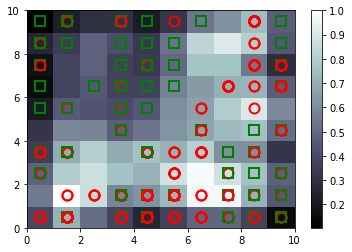

In [6]:
#VISUALIZING THE RESULTS:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
#bone function: if we execute it alone, we get a white window without anything in it
#because we just initialize the window that will contain the map
#pcolor: different colors are corresponding to the different rane values of the mean interneuron distances
#distance map method: will return all the mean interneuron distances in one matrix
#.T: transpose of this MID matrix
#colorbar: adds which color refers to highest MIDs and lowest MIDs. these are the normalized values
#frauds are where the MID is the highest, the outlaying winning nodes, so here where the color is lighter
#markers: o is circle, s is square: for customers who got approval and who didnt
#red circles: customer who didn't get approval
#green squares: got approval

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()
# i: is the different values of all the indexes in X 0 to 689
# x: is the different vectors of customers. rows
#enumerate: it allows to loop over something and have an automatic counter
# w: is the winning node. we get the winning node for specific customer
# we want to add a colored market on the winning node
#the marker depends on whether the customer get approval or not
# w[0], w[1]: that's the coordinates of the winning node. 0.5 puts the markers on the center
# markers[y[i]]: this will give us the information whether the customer get approval or not
# if the y[i] = 0 then the customer didn't get approval and then
#markers[0] will be the red circle and so on. 
#it's same for the colors[y[i]]

In [10]:
#FINDING THE FRAUDS:
mappings = som.win_map(X)

frauds = np.concatenate((mappings[(7,1)], mappings[(7,2)], ), axis = 0)
frauds = sc.inverse_transform(frauds)
frauds_df =pd.DataFrame(frauds)
frauds_df
#column number 0 is the customer ID.
#the bank can investigate more about those customers to catch potential fraud

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15777994.0,1.0,42.00,9.790,2.0,14.0,8.0,7.960,1.0,1.0,8.0,0.0,2.0,0.0,1.0
1,15792107.0,0.0,33.92,1.585,1.0,1.0,1.0,0.000,1.0,0.0,0.0,0.0,2.0,320.0,1.0
2,15813192.0,0.0,24.92,1.250,2.0,1.0,1.0,0.000,1.0,0.0,0.0,0.0,2.0,80.0,1.0
3,15790254.0,0.0,18.92,9.000,2.0,6.0,4.0,0.750,1.0,1.0,2.0,0.0,2.0,88.0,592.0
4,15748552.0,0.0,30.67,12.000,2.0,8.0,4.0,2.000,1.0,1.0,1.0,0.0,2.0,220.0,20.0
5,15757467.0,0.0,52.83,15.000,2.0,8.0,4.0,5.500,1.0,1.0,14.0,0.0,2.0,0.0,2201.0
6,15801441.0,0.0,35.75,0.915,2.0,6.0,4.0,0.750,1.0,1.0,4.0,0.0,2.0,0.0,1584.0
7,15815443.0,0.0,57.08,19.500,2.0,8.0,4.0,5.500,1.0,1.0,7.0,0.0,2.0,0.0,3001.0
8,15748432.0,0.0,58.33,10.000,2.0,11.0,4.0,4.000,1.0,1.0,14.0,0.0,2.0,0.0,1603.0
9,15788131.0,0.0,29.50,0.460,2.0,4.0,4.0,0.540,1.0,1.0,4.0,0.0,2.0,380.0,501.0


In [13]:
#BONUS: GET white and light coordinates:
mapping2 = som.distance_map().T
all_coordinates = {}
i_counter = 0
for i in mapping2:
    counter_x = 0
    for x in i:
        value = x
        coordinate = (counter_x,i_counter)
        all_coordinates[coordinate] = value
        counter_x += 1
    i_counter += 1
white = []
for x in all_coordinates.keys():
    if all_coordinates[x] >= 0.80:
        white.append(x)
white

[(1, 1),
 (2, 1),
 (6, 1),
 (7, 1),
 (2, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (2, 3),
 (6, 3),
 (8, 5),
 (6, 8),
 (7, 8),
 (8, 8)]